In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
dataset = pd.read_excel("dadosEUA.xlsx")

In [49]:
print(dataset.shape)

(45, 8)


In [50]:
dataset.head()

,Fertilizer,Pesticide,Chemical,Crop,Energy,Land,Labor,Others
0,3.190920,1.062667,2.073271,7.509311,5.089436,6.397756,12.076608,1.897123
1,3.213763,1.094315,2.103845,7.343501,5.573420,6.477291,11.537177,2.017228
2,2.904737,1.108723,1.977411,7.728201,5.518810,6.565486,11.005933,2.236761
3,3.361991,1.036738,2.132146,7.886969,5.529642,6.623468,10.345670,2.135136
4,3.678557,1.031267,2.265618,8.307314,5.522220,6.638038,9.851933,2.109933


In [51]:
dataset.columns

Index(['Fertilizer', 'Pesticide', 'Chemical', 'Crop', 'Energy', 'Land',
       'Labor', 'Others'],
      dtype='object')

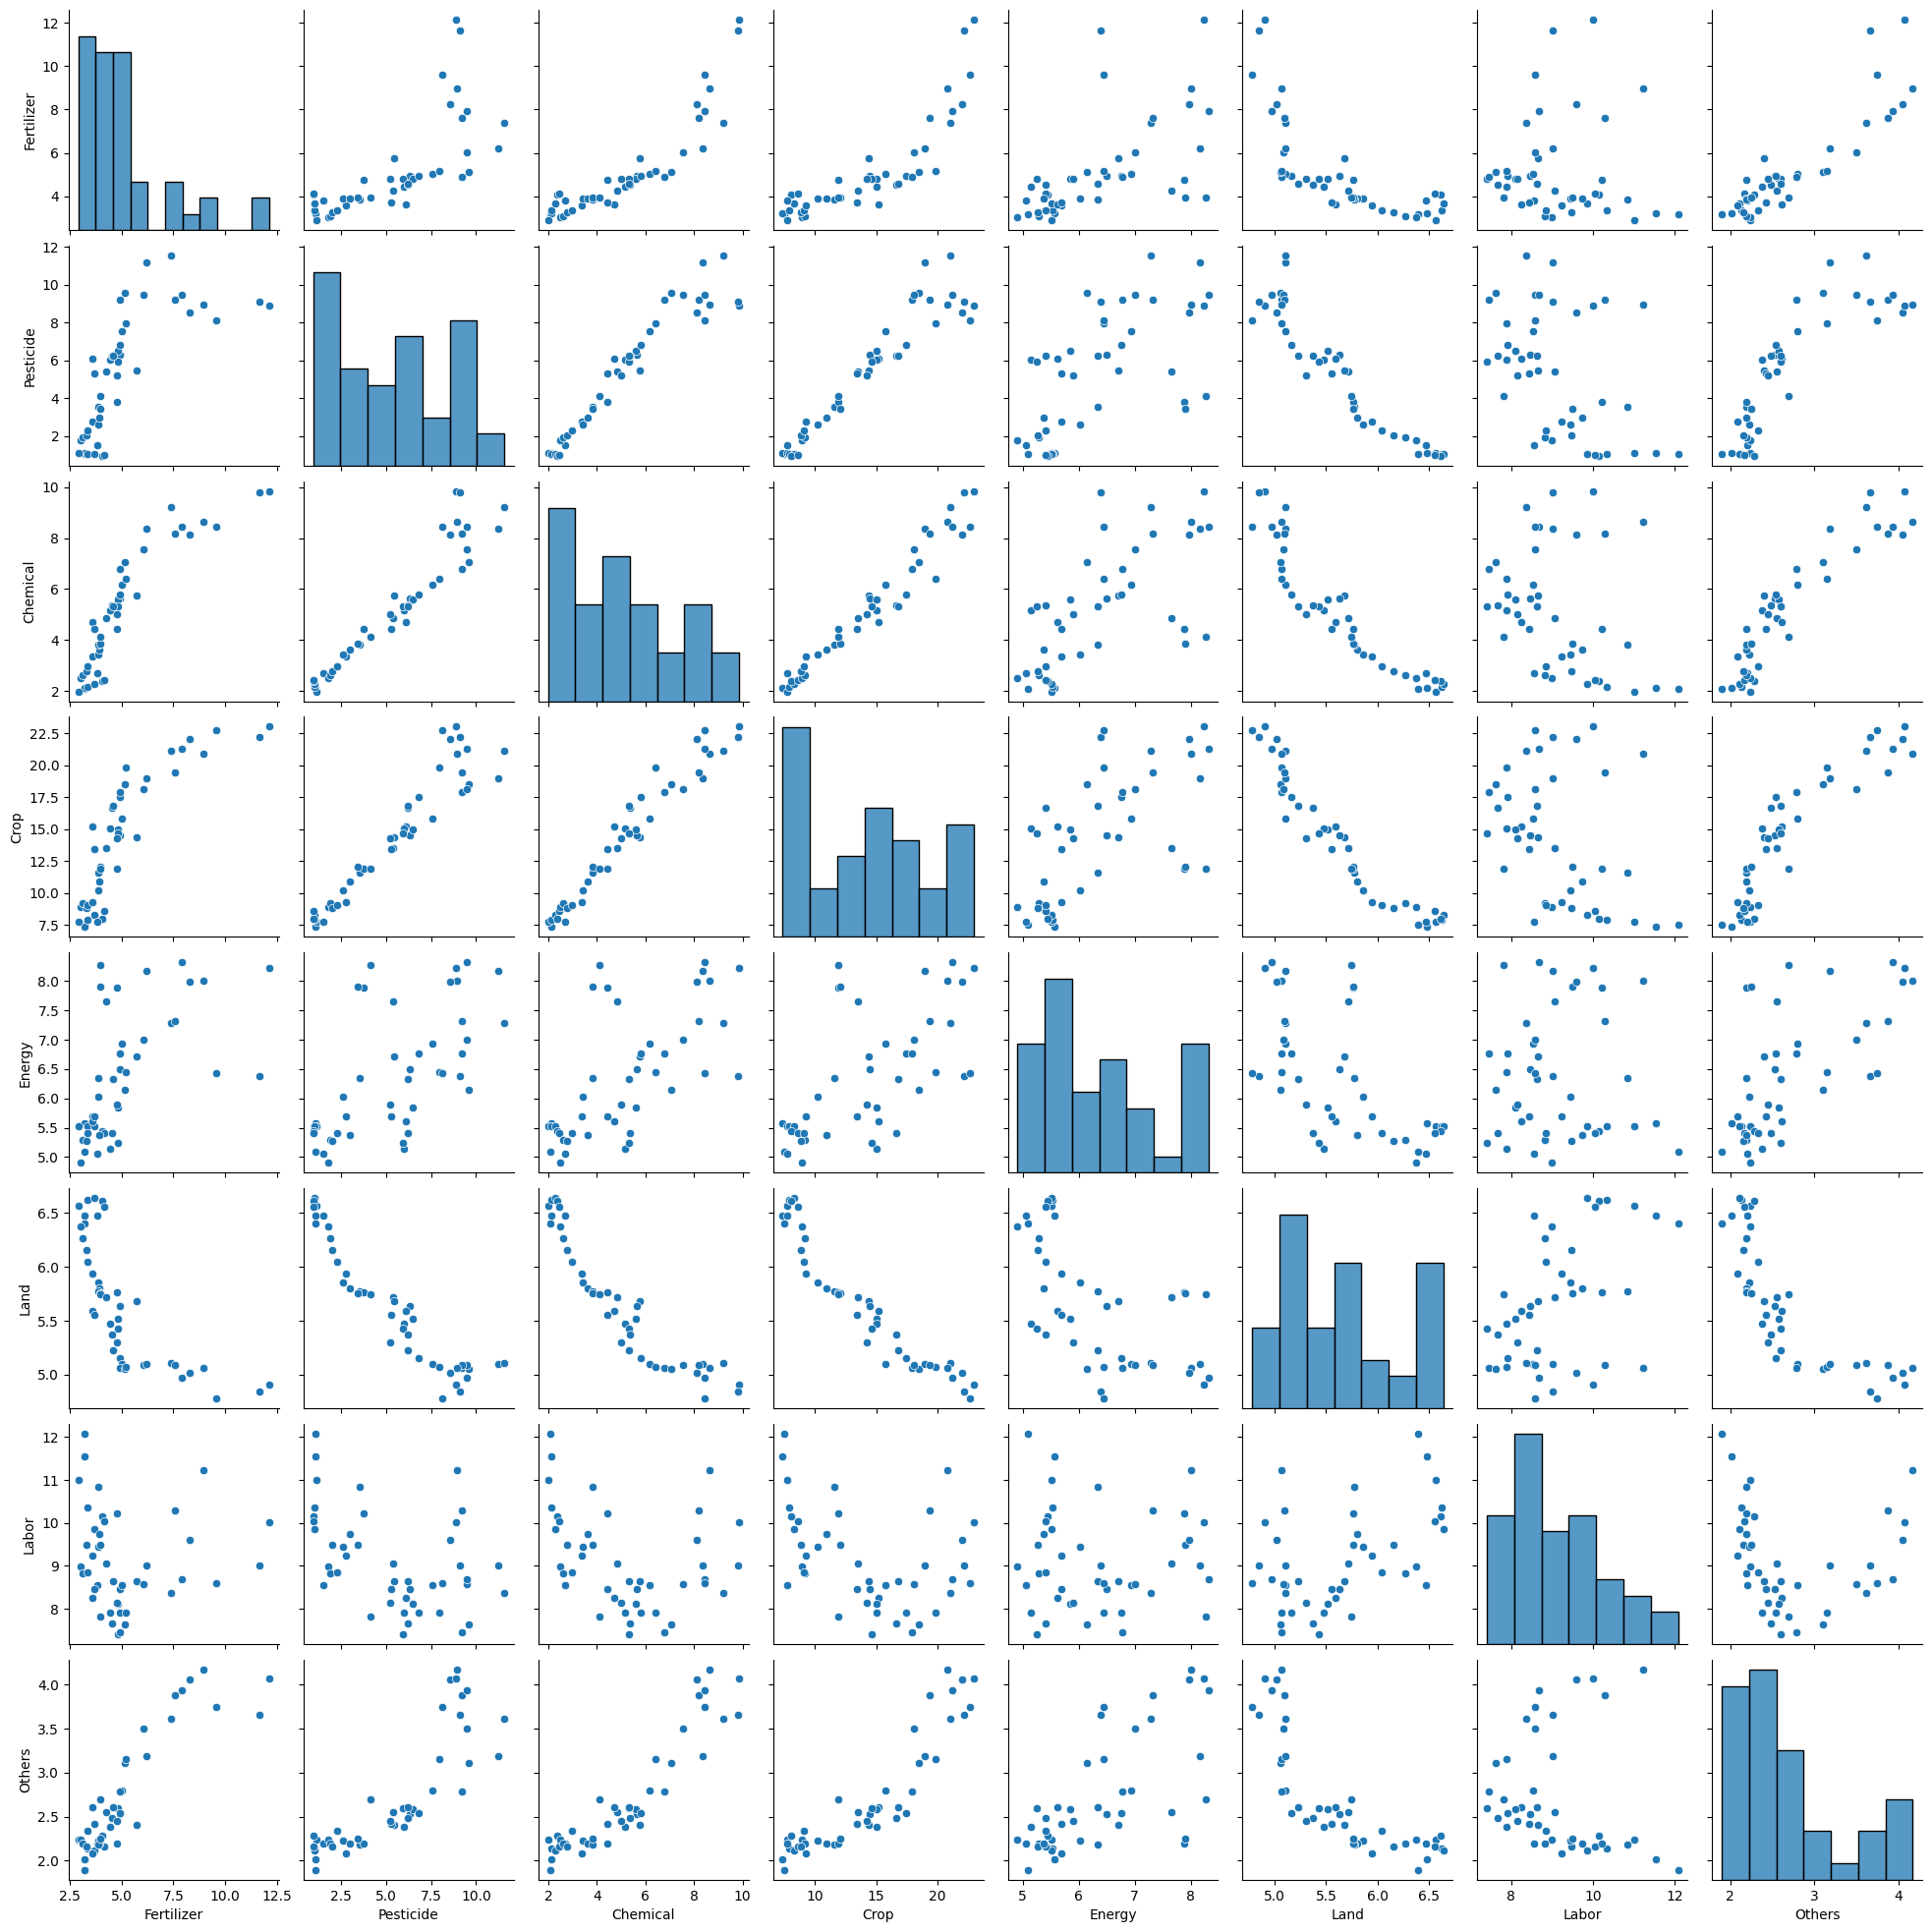

In [52]:
sns.pairplot(dataset)

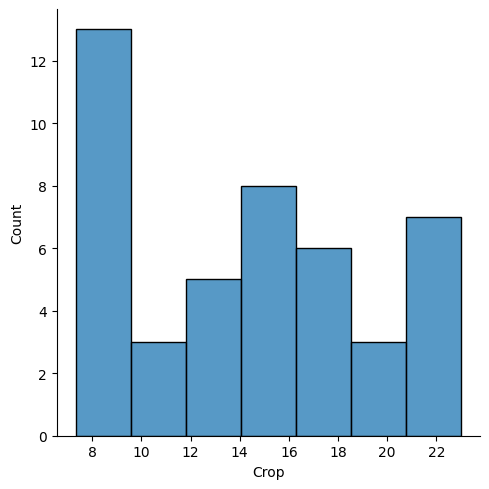

In [53]:
sns.displot(dataset["Crop"])

<Axes: >

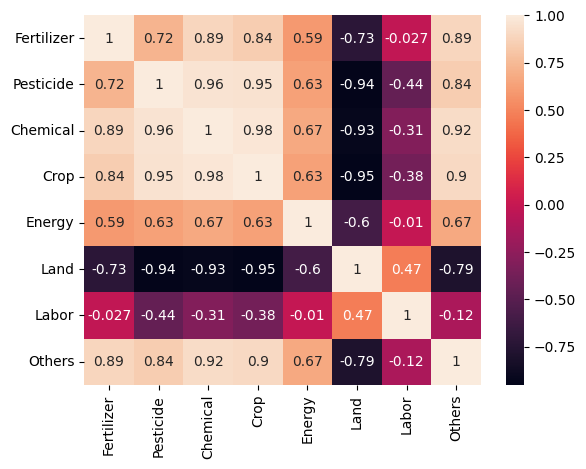

In [54]:
sns.heatmap(dataset.corr(), annot=True)

In [55]:
x = dataset[["Fertilizer","Pesticide","Chemical", 'Crop', 'Energy', 'Land',
       'Labor', 'Others']]

y = dataset["Crop"]

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.18, random_state=None)

In [90]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [91]:
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
print(lr.intercept_)

-0.11131466656703992


In [93]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])

In [94]:
coeff_df

,Coefficient
Fertilizer,-0.006896
Pesticide,-0.004143
Chemical,0.019069
Crop,0.999092
Energy,0.003782
Land,0.018503
Labor,-0.001233
Others,-0.010975


In [95]:
y_pred = lr.predict(x_test)

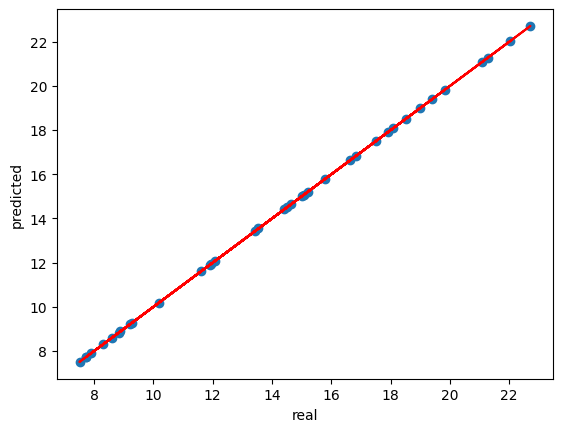

In [96]:
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()

In [97]:
accuracy = (lr.score(x_test, y_test))*100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


In [98]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# imprimir os resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.01
MSE: 0.00
RMSE: 0.01
R²: 1.00
